In [1]:
import analysis
import analyze_v1_11_tools as tools1_11
import joblib
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import run_models

%matplotlib inline
%load_ext autoreload
%autoreload 2

r = tools1_11.ro.r

tomov_interop could not load matlab


R[write to console]: Loading required package: dfidx

R[write to console]: 
Attaching package: ‘dfidx’


R[write to console]: The following object is masked from ‘package:stats’:

    filter




In [2]:
exp = analysis.load_exp1()

Modal sequence length=99 ['CircleGraphNavigationInstruction', 'SimpleInstruction', 'HTMLForm', 'CircleGraphNavigationx2', 'MapInstruction', 'CircleGraphNavigationx2', 'SimpleInstruction', 'CircleGraphNavigationx60', 'HTMLForm', 'CirclePathIdentificationx2', 'SimpleInstruction', 'CirclePathIdentificationx10', 'HTMLForm', 'CirclePathIdentificationx2', 'SimpleInstruction', 'CirclePathIdentificationx11', 'survey-multi-choice']
summary of participant data. total participants 966
	type complete | # participants 952
	type did-at-most-12-things-then-restart | # participants 5
	type instructions-twice | # participants 1
	type unusable: completed after restart | # participants 8
Modal sequence length=99 ['CircleGraphNavigationInstruction', 'SimpleInstruction', 'HTMLForm', 'CircleGraphNavigationx2', 'MapInstruction', 'CircleGraphNavigationx2', 'SimpleInstruction', 'CircleGraphNavigationx60', 'HTMLForm', 'CirclePathIdentificationx2', 'SimpleInstruction', 'CirclePathIdentificationx10', 'HTMLForm', 

# *Comparing subgoal choice to theories*
## Multinomial choice model

In [3]:
ft = analysis.FeatureSelection.run_analysis(exp)
ft.save('mlogit-models.bin')

  0%|          | 0/806 [00:00<?, ?it/s]

ProbeType(key='subgoal', verbose='"What location would you set as a subgoal?"', name='Explicit Probe', random_effects=True)


  0%|          | 0/10 [00:00<?, ?it/s]

ProbeType(key='solway2014', verbose='"Choose a location you would visit along the way."', name='Implicit Probe', random_effects=True)


  0%|          | 0/10 [00:00<?, ?it/s]

ProbeType(key='busStop', verbose='Instant Teleportation', name='Teleportation Question', random_effects=False)


  0%|          | 0/10 [00:00<?, ?it/s]

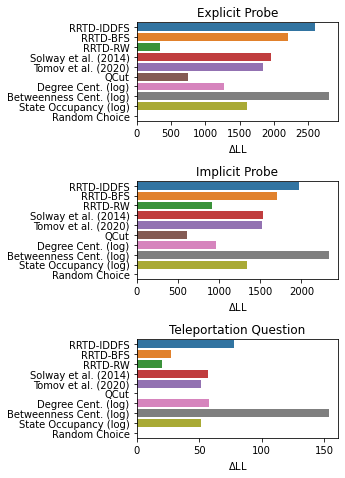

In [4]:
ft.plot(figure_fn='feature-selection.*')

In [5]:
ft.table(analysis.models_without_random)

\begin{tabular}{llll}
\toprule
\rule{0pt}{3em}{} &                                                             Explicit Probe &                                                             Implicit Probe &                                                   Teleportation Question \\[2em]
\hline
\midrule
\rule{0pt}{3em}RRTD-IDDFS                             &   \makecell{$\beta=1.78$ \\ $SE=0.04$ \\ $\chi^2(2)=5183.1$ \\ $p < .001$} &   \makecell{$\beta=1.63$ \\ $SE=0.04$ \\ $\chi^2(2)=3941.2$ \\ $p < .001$} &  \makecell{$\beta=0.73$ \\ $SE=0.06$ \\ $\chi^2(1)=155.7$ \\ $p < .001$} \\[2em]
\hline
\rule{0pt}{3em}RRTD-BFS                               &   \makecell{$\beta=4.98$ \\ $SE=0.10$ \\ $\chi^2(2)=4412.8$ \\ $p < .001$} &   \makecell{$\beta=4.94$ \\ $SE=0.11$ \\ $\chi^2(2)=3402.8$ \\ $p < .001$} &   \makecell{$\beta=1.45$ \\ $SE=0.20$ \\ $\chi^2(1)=55.1$ \\ $p < .001$} \\[2em]
\hline
\rule{0pt}{3em}RRTD-RW                                &    \makecell{$\beta=0.37$ \\ $SE=0.02$ \\ $\ch

,Explicit Probe,Implicit Probe,Teleportation Question
Algorithm,,,
RRTD-IDDFS,\makecell{$\beta=1.78$ \\ $SE=0.04$ \\ $\chi^2...,\makecell{$\beta=1.63$ \\ $SE=0.04$ \\ $\chi^2...,\makecell{$\beta=0.73$ \\ $SE=0.06$ \\ $\chi^2...
RRTD-BFS,\makecell{$\beta=4.98$ \\ $SE=0.10$ \\ $\chi^2...,\makecell{$\beta=4.94$ \\ $SE=0.11$ \\ $\chi^2...,\makecell{$\beta=1.45$ \\ $SE=0.20$ \\ $\chi^2...
RRTD-RW,\makecell{$\beta=0.37$ \\ $SE=0.02$ \\ $\chi^2...,\makecell{$\beta=0.92$ \\ $SE=0.03$ \\ $\chi^2...,\makecell{$\beta=0.29$ \\ $SE=0.05$ \\ $\chi^2...
\makecell{Solway et al. \\ (2014)},\makecell{$\beta=0.75$ \\ $SE=0.02$ \\ $\chi^2...,\makecell{$\beta=0.69$ \\ $SE=0.02$ \\ $\chi^2...,\makecell{$\beta=0.37$ \\ $SE=0.03$ \\ $\chi^2...
\makecell{Tomov et al. \\ (2020)},\makecell{$\beta=1.09$ \\ $SE=0.03$ \\ $\chi^2...,\makecell{$\beta=0.97$ \\ $SE=0.02$ \\ $\chi^2...,\makecell{$\beta=0.41$ \\ $SE=0.04$ \\ $\chi^2...
QCut,\makecell{$\beta=-0.14$ \\ $SE=0.01$ \\ $\chi^...,\makecell{$\beta=-0.19$ \\ $SE=0.01$ \\ $\chi^...,\makecell{$\beta=0.04$ \\ $SE=0.04$ \\ $\chi^2...
\makecell{Degree Cent. \\ (log)},\makecell{$\beta=0.73$ \\ $SE=0.02$ \\ $\chi^2...,\makecell{$\beta=0.64$ \\ $SE=0.02$ \\ $\chi^2...,\makecell{$\beta=0.45$ \\ $SE=0.04$ \\ $\chi^2...
\makecell{Betweenness Cent. \\ (log)},\makecell{$\beta=0.86$ \\ $SE=0.02$ \\ $\chi^2...,\makecell{$\beta=0.82$ \\ $SE=0.02$ \\ $\chi^2...,\makecell{$\beta=0.58$ \\ $SE=0.03$ \\ $\chi^2...
\makecell{State Occupancy \\ (log)},\makecell{$\beta=1.00$ \\ $SE=0.03$ \\ $\chi^2...,\makecell{$\beta=0.89$ \\ $SE=0.03$ \\ $\chi^2...,\makecell{$\beta=0.39$ \\ $SE=0.04$ \\ $\chi^2...


## Run analysis again to exclude drawing

In [6]:
exp_nodraw = analysis.load_exp1(nodraw=True)

Modal sequence length=99 ['CircleGraphNavigationInstruction', 'SimpleInstruction', 'HTMLForm', 'CircleGraphNavigationx2', 'MapInstruction', 'CircleGraphNavigationx2', 'SimpleInstruction', 'CircleGraphNavigationx60', 'HTMLForm', 'CirclePathIdentificationx2', 'SimpleInstruction', 'CirclePathIdentificationx10', 'HTMLForm', 'CirclePathIdentificationx2', 'SimpleInstruction', 'CirclePathIdentificationx11', 'survey-multi-choice']
summary of participant data. total participants 966
	type complete | # participants 952
	type did-at-most-12-things-then-restart | # participants 5
	type instructions-twice | # participants 1
	type unusable: completed after restart | # participants 8
Modal sequence length=99 ['CircleGraphNavigationInstruction', 'SimpleInstruction', 'HTMLForm', 'CircleGraphNavigationx2', 'MapInstruction', 'CircleGraphNavigationx2', 'SimpleInstruction', 'CircleGraphNavigationx60', 'HTMLForm', 'CirclePathIdentificationx2', 'SimpleInstruction', 'CirclePathIdentificationx10', 'HTMLForm', 

In [7]:
ft_nodraw = analysis.FeatureSelection.run_analysis(exp_nodraw)
ft_nodraw.save('mlogit-models-nodraw.bin')

  0%|          | 0/603 [00:00<?, ?it/s]

ProbeType(key='subgoal', verbose='"What location would you set as a subgoal?"', name='Explicit Probe', random_effects=True)


  0%|          | 0/10 [00:00<?, ?it/s]

ProbeType(key='solway2014', verbose='"Choose a location you would visit along the way."', name='Implicit Probe', random_effects=True)


  0%|          | 0/10 [00:00<?, ?it/s]

ProbeType(key='busStop', verbose='Instant Teleportation', name='Teleportation Question', random_effects=False)


  0%|          | 0/10 [00:00<?, ?it/s]

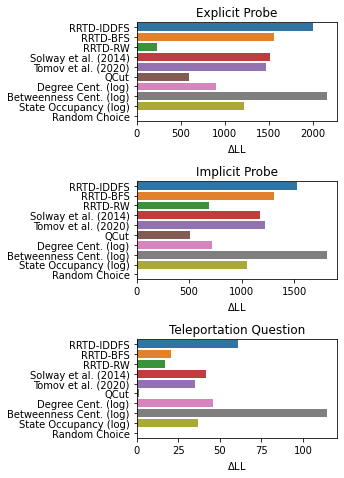

In [8]:
ft_nodraw.plot(figure_fn='feature-selection-nodraw.*')

In [9]:
ft_nodraw.table(analysis.models_without_random)

\begin{tabular}{llll}
\toprule
\rule{0pt}{3em}{} &                                                             Explicit Probe &                                                             Implicit Probe &                                                   Teleportation Question \\[2em]
\hline
\midrule
\rule{0pt}{3em}RRTD-IDDFS                             &   \makecell{$\beta=1.84$ \\ $SE=0.04$ \\ $\chi^2(2)=4004.7$ \\ $p < .001$} &   \makecell{$\beta=1.69$ \\ $SE=0.04$ \\ $\chi^2(2)=3058.4$ \\ $p < .001$} &  \makecell{$\beta=0.76$ \\ $SE=0.07$ \\ $\chi^2(1)=121.6$ \\ $p < .001$} \\[2em]
\hline
\rule{0pt}{3em}RRTD-BFS                               &   \makecell{$\beta=4.47$ \\ $SE=0.11$ \\ $\chi^2(2)=3114.7$ \\ $p < .001$} &   \makecell{$\beta=5.25$ \\ $SE=0.14$ \\ $\chi^2(2)=2614.5$ \\ $p < .001$} &   \makecell{$\beta=1.51$ \\ $SE=0.24$ \\ $\chi^2(1)=40.8$ \\ $p < .001$} \\[2em]
\hline
\rule{0pt}{3em}RRTD-RW                                &    \makecell{$\beta=0.35$ \\ $SE=0.03$ \\ $\ch

,Explicit Probe,Implicit Probe,Teleportation Question
Algorithm,,,
RRTD-IDDFS,\makecell{$\beta=1.84$ \\ $SE=0.04$ \\ $\chi^2...,\makecell{$\beta=1.69$ \\ $SE=0.04$ \\ $\chi^2...,\makecell{$\beta=0.76$ \\ $SE=0.07$ \\ $\chi^2...
RRTD-BFS,\makecell{$\beta=4.47$ \\ $SE=0.11$ \\ $\chi^2...,\makecell{$\beta=5.25$ \\ $SE=0.14$ \\ $\chi^2...,\makecell{$\beta=1.51$ \\ $SE=0.24$ \\ $\chi^2...
RRTD-RW,\makecell{$\beta=0.35$ \\ $SE=0.03$ \\ $\chi^2...,\makecell{$\beta=0.93$ \\ $SE=0.03$ \\ $\chi^2...,\makecell{$\beta=0.31$ \\ $SE=0.06$ \\ $\chi^2...
\makecell{Solway et al. \\ (2014)},\makecell{$\beta=0.76$ \\ $SE=0.02$ \\ $\chi^2...,\makecell{$\beta=0.70$ \\ $SE=0.02$ \\ $\chi^2...,\makecell{$\beta=0.37$ \\ $SE=0.04$ \\ $\chi^2...
\makecell{Tomov et al. \\ (2020)},\makecell{$\beta=1.13$ \\ $SE=0.03$ \\ $\chi^2...,\makecell{$\beta=1.01$ \\ $SE=0.03$ \\ $\chi^2...,\makecell{$\beta=0.39$ \\ $SE=0.05$ \\ $\chi^2...
QCut,\makecell{$\beta=-0.15$ \\ $SE=0.01$ \\ $\chi^...,\makecell{$\beta=-0.21$ \\ $SE=0.01$ \\ $\chi^...,\makecell{$\beta=0.07$ \\ $SE=0.04$ \\ $\chi^2...
\makecell{Degree Cent. \\ (log)},\makecell{$\beta=0.71$ \\ $SE=0.02$ \\ $\chi^2...,\makecell{$\beta=0.64$ \\ $SE=0.02$ \\ $\chi^2...,\makecell{$\beta=0.46$ \\ $SE=0.05$ \\ $\chi^2...
\makecell{Betweenness Cent. \\ (log)},\makecell{$\beta=0.89$ \\ $SE=0.02$ \\ $\chi^2...,\makecell{$\beta=0.85$ \\ $SE=0.02$ \\ $\chi^2...,\makecell{$\beta=0.58$ \\ $SE=0.04$ \\ $\chi^2...
\makecell{State Occupancy \\ (log)},\makecell{$\beta=1.02$ \\ $SE=0.03$ \\ $\chi^2...,\makecell{$\beta=0.92$ \\ $SE=0.03$ \\ $\chi^2...,\makecell{$\beta=0.38$ \\ $SE=0.05$ \\ $\chi^2...


## Predict choice among optimal paths

In [10]:
import pred_optimal_choice
import types

random_model = types.SimpleNamespace(
    name='Random Choice',
    model=lambda mdp: dict(scores=np.zeros(len(mdp.state_list))),
)

df = []
poc = pred_optimal_choice.PredictOptimalChoice(exp)
for m in tqdm(analysis.models_without_random_or_fixed + [random_model]):
    ll, ll_kw, bounds = poc.make_choice_model_ll_fn(m)
    r = pred_optimal_choice.minimize_from_ll(
        lambda x, **kw: ll(x[0], x[1], **kw),
        np.array([1, 1]),
        progress=10, ll_kw=ll_kw, bounds=bounds)
    df.append(dict(
        logLik=r.ll,
        LL=r.ll,
        AIC=r.aic,
        coef=m.name,
        fitted=r.result.x,
    ))
joblib.dump(df, 'pred-optimal-choice-with-models.bin')

  0%|          | 0/9 [00:00<?, ?it/s]

iter=10, cost=0.84, x=[3.21468657 1.38303286]
iter=10, cost=0.84, x=[5.56078722 0.70345513]
iter=10, cost=0.83, x=[2.79250775 1.71547636]


['pred-optimal-choice-with-models.bin']

In [11]:
pd.DataFrame(df)

,logLik,LL,AIC,coef,fitted
0,-5478.382872,-5478.382872,10960.765744,RRTD-IDDFS,"[1.6316876071771158, 1.2632098683242272]"
1,-5513.889586,-5513.889586,11031.779171,RRTD-BFS,"[14.812784442097517, 21.740067105215243]"
2,-5487.028054,-5487.028054,10978.056108,RRTD-RW,"[0.9205313179440731, 0.6668724805902105]"
3,-5492.829127,-5492.829127,10989.658255,Solway et al. (2014),"[6.143396532882155, 1.2311887220805562]"
4,-5496.929749,-5496.929749,10997.859498,Tomov et al. (2020),"[2.0539587976399454, 1.7055815921902657]"
5,-5545.563997,-5545.563997,11095.127995,QCut,"[0.0, 1.3002599496928382]"
6,-5498.192688,-5498.192688,11000.385376,Degree Cent. (log),"[5.825371999065991, 0.6837203692579715]"
7,-5455.002671,-5455.002671,10914.005343,Betweenness Cent. (log),"[2.7925077464670203, 1.7154763614079698]"
8,-5545.598532,-5545.598532,11095.197064,Random Choice,"[1.0, 1.0000314859251698]"


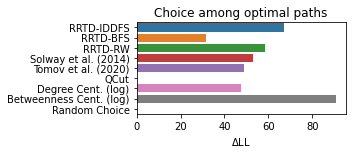

In [12]:
f, ax = plt.subplots(1, 1, figsize=(5, 2.25))
analysis.FeatureSelection.rel_plot(pd.DataFrame(df), key='LL', ax=ax)
plt.title('Choice among optimal paths')
plt.tight_layout()
analysis.savefig(f'model-comparison-for-optimal-choice.*')

# *Appendix*: Predict response times

In [13]:
def build_df(exp):
    import run_models

    gi_to_model_to_scores = {
        gi: {
            model.key: model.model(g)['scores']
            for model in analysis.models_without_random_or_fixed
        }
        for gi, g in enumerate(exp.mdps())
    }

    df = []
    for p in exp.participants:
        graph = p.config_idx()['graph']
        for t in p.navigation_trials(return_obj=True):
            if t.is_filler_trial or not t.is_optimal:
                continue
            # NOTE: We skip initial state.
            events = t.dwell_events()[1:]
            for d in events:
                df.append(dict(
                    pid=p.pid,
                    graph=graph,
                    duration_sec=d.duration_sec,
                    trial_idx=t.task['trial_idx_for_type'],
                    **{
                        m: scores[d.state]
                        for m, scores in gi_to_model_to_scores[graph].items()
                    },
                ))
    orig_df = pd.DataFrame(df)
    df = tools1_11.normdf(orig_df)
    # NOTE: duration should NOT be normalized, since we predict its logarithm.
    df['duration_sec'] = orig_df['duration_sec']
    return df

print(build_df(exp).shape)
build_df(exp).head()

(25382, 12)


,pid,graph,duration_sec,trial_idx,iddfs,bfs,rw,solwayr_partition_greedy_uniformexit_require_all_partitions_have_non_exit,tomov,qcut,log_degree_centrality,log_betweenness_centrality
0,md5:0071f52aa65215462c771caf20090db3,23,0.856,4,-3.130643,-0.795419,-1.565555,-1.822988,-2.893028,0.289565,-0.548697,-2.389693
1,md5:0071f52aa65215462c771caf20090db3,23,1.196,8,-0.050741,-0.625275,-0.226317,0.548550,0.716654,0.940979,0.480813,1.113147
2,md5:0071f52aa65215462c771caf20090db3,23,1.188,10,-3.130643,-0.795419,-1.565555,-1.822988,-2.893028,0.289565,-0.548697,-2.389693
3,md5:0071f52aa65215462c771caf20090db3,23,1.097,12,-0.578991,-0.501533,-1.565555,0.548550,1.190073,-1.969610,-0.548697,0.854937
4,md5:0071f52aa65215462c771caf20090db3,23,1.160,14,-0.578991,-0.501533,-1.565555,0.548550,1.190073,-1.969610,-0.548697,0.854937


In [14]:
def fit_lmer(
    formula, df, *,
    show_summary=False,
    optimizer='Nelder_Mead',
    null_model_formula=None,
    max_iterations=10_000,
    ignore_singular_fit=False,
):
    lmer_control_args = {
        'Nelder_Mead': ["optimizer ='Nelder_Mead'", f"optCtrl=list(maxfun={max_iterations})"],
        'nlminb': ["optimizer ='optimx'", f"optCtrl=list(method='nlminb', maxit={max_iterations})"],
        'L-BFGS-B': ["optimizer ='optimx'", f"optCtrl=list(method='L-BFGS-B', maxit={max_iterations})"],
    }[optimizer]

    if ignore_singular_fit:
        # https://stackoverflow.com/questions/54597496/how-to-cope-with-a-singular-fit-in-a-linear-mixed-model-lme4
        lmer_control_args += [
            'check.conv.singular=.makeCC(action="ignore", tol=1e-4)'
        ]

    m, summary, optMsg, fixef = tools1_11.r_with_vars(f'''
    library('lme4')
    m = lmer(
        {formula},
        df,
        REML=FALSE,
        control=lmerControl({", ".join(lmer_control_args)}),
    )
    s = summary(m)
    if (show_summary) {{
        show(s)
    }}
    opt = s$optinfo$conv$lme4$messages
    if (is.null(opt)) {{
        # This isn't really ideal -- we can't return a c() here since that's just a NULL
        # But in general we would need more complex conversion if this were properly an rlang list()
        opt = list()
    }}

    list(m, s, opt, as.data.frame(s$coef))
    ''', df=df, show_summary=show_summary)
    optMsg = list(optMsg)

    # This check handles both
    # - Model failed to converge with max / Model is nearly unidentifiable
    # - boundary (singular) fit
    assert not optMsg, f'Optimization error with model {formula}: {optMsg}'

    lrtest_models = {}
    if null_model_formula:
        null_model = tools1_11.r_with_vars(f'''
        lm({null_model_formula}, df)
        ''', df=df)
        lrtest_models[()] = null_model
    d = dict(tools1_11.convert_model(['placeholder'], m, lrtest_models), formula=formula)
    d['coef'] = tools1_11.convert_rdf_to_df(fixef)
    return d

fit_lmer('log(duration_sec) ~ trial_idx + (1|pid)', df=build_df(exp), show_summary=True)

R[write to console]: Loading required package: Matrix



Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: log(duration_sec) ~ trial_idx + (1 | pid)
   Data: df
Control: lmerControl(optimizer = "Nelder_Mead", optCtrl = list(maxfun = 10000))

     AIC      BIC   logLik deviance df.resid 
 34942.6  34975.2 -17467.3  34934.6    25378 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4756 -0.6111 -0.1536  0.4220 10.1381 

Random effects:
 Groups   Name        Variance Std.Dev.
 pid      (Intercept) 0.06959  0.2638  
 Residual             0.21500  0.4637  
Number of obs: 25382, groups:  pid, 806

Fixed effects:
              Estimate Std. Error t value
(Intercept)  0.3954444  0.0110634   35.74
trial_idx   -0.0042106  0.0001707  -24.66

Correlation of Fixed Effects:
          (Intr)
trial_idx -0.469


{'coef':              Estimate  Std. Error    t value
 (Intercept)  0.395444    0.011063  35.743424
 trial_idx   -0.004211    0.000171 -24.659888,
 'AIC': 34942.587331284034,
 'logLik': -17467.293665642017,
 'random_effects': array([0.47872434, 0.46188198, 0.4534608 , ..., 0.15662403, 0.13978167,
        0.13136049]),
 'lrtests': {(): {'error': 'nested model not present: ()'}},
 'formula': 'log(duration_sec) ~ trial_idx + (1|pid)'}

In [15]:
df = build_df(exp)

In [16]:
def _try_all_opt(fn):
    '''
    Try all optimizers. They all reach same minima in practice, but some fail where others work.
    '''
    error = None
    for o in [
        'Nelder_Mead',
        'nlminb',
        'L-BFGS-B',
    ]:
        try:
            return fn(o)
        except Exception as err:
            print(f'Error with {o}: {str(err)}')
            error = err
    raise error

In [17]:
nmf = 'log(duration_sec) ~ 1'

mdf = []
for m in tqdm(analysis.models_without_random_or_fixed):
    factor = m.key
    fml = f'log(duration_sec) ~ 1+trial_idx+{factor}+(1+{factor}|graph:pid)+(1+{factor}|graph)'
    res = _try_all_opt(lambda o: fit_lmer(
        fml,
        df,
        optimizer=o,
        null_model_formula=nmf,
        ignore_singular_fit=True,
    ))
    mdf.append(dict(
        logLik=res['logLik'],
        LL=res['logLik'],
        NLL=-res['logLik'],
        AIC=res['AIC'],
        coef=m.name,
        model_info=m,
        model=res,
    ))
mdf = pd.DataFrame(mdf)

  0%|          | 0/8 [00:00<?, ?it/s]

Error with Nelder_Mead: Optimization error with model log(duration_sec) ~ 1+trial_idx+qcut+(1+qcut|graph:pid)+(1+qcut|graph): ['unable to evaluate scaled gradient', 'Model failed to converge: degenerate  Hessian with 1 negative eigenvalues']


R[write to console]: Loading required namespace: optimx



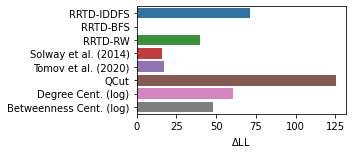

In [18]:
f, ax = plt.subplots(1, 1, figsize=(5, 2.25))
analysis.FeatureSelection.rel_plot(pd.DataFrame(mdf), key='LL', ax=ax)
plt.tight_layout()
analysis.savefig('rt-model-comparisons.*')

In [19]:
def print_table(mdf):
    models_by_name = {
        row.model_info.key: row.model
        for row in mdf.itertuples()
    }

    mcdf = []
    for mtype in analysis.models_without_random_or_fixed:
        mm = models_by_name[mtype.key]
        beta = mm['coef']['Estimate'][mtype.key]
        beta_se = mm['coef']['Std. Error'][mtype.key]
        lrt = mm['lrtests'][()]
        pv = lrt['Pr(>Chisq)'][1]
        chisq = lrt['Chisq'][1]
        df = lrt['Df'][1]
        row = {
            'Algorithm': mtype.name,#.replace(' (', ' \n('),
            f'$\\beta$': f'{beta:.02f}',
            f'SE': f'{beta_se:.02f}',
            'Likelihood ratio test': f'$\\chi^2({int(df)})={chisq:.1f}$, ${analysis.pvalue(pv)}$',
        }
        mcdf.append(row)
    mcdf = pd.DataFrame(mcdf)#.set_index('Algorithm')

    with pd.option_context('display.max_colwidth', 999999):
        lines = mcdf.to_latex(escape=False, index_names=False, index=False).split('\n')
        print('\n'.join([
            # f'\\rule{{0pt}}{{3em}}{line}[2em]\n\\hline' if r'\\' in line else line
            (
                line
                .replace(r'\toprule', r'\thickhline')
                .replace(r'\midrule', r'\hline')
                .replace(r'\bottomrule', '')
            )
            for line in lines
        ]))
print_table(mdf)

\begin{tabular}{llll}
\thickhline
              Algorithm & $\beta$ &   SE &          Likelihood ratio test \\
\hline
             RRTD-IDDFS &    0.07 & 0.03 & $\chi^2(8)=6074.8$, $p < .001$ \\
               RRTD-BFS &    0.34 & 0.12 & $\chi^2(8)=5932.4$, $p < .001$ \\
                RRTD-RW &    0.03 & 0.02 & $\chi^2(8)=6012.7$, $p < .001$ \\
   Solway et al. (2014) &    0.03 & 0.01 & $\chi^2(8)=5964.5$, $p < .001$ \\
    Tomov et al. (2020) &    0.03 & 0.01 & $\chi^2(8)=5966.5$, $p < .001$ \\
                   QCut &   -0.05 & 0.01 & $\chi^2(8)=6182.9$, $p < .001$ \\
     Degree Cent. (log) &    0.04 & 0.01 & $\chi^2(8)=6053.6$, $p < .001$ \\
Betweenness Cent. (log) &    0.05 & 0.01 & $\chi^2(8)=6028.5$, $p < .001$ \\

\end{tabular}



# Appendix: *Testing whether icons influence participant choice analysis*

Initially started this analysis in a separate file, though it would have been more straightforward
to build it based on the existing multinomial choice data pipeline. I validate that this produces
the same results in a quality control section down below.

In [20]:
def _icon_name(icon):
    enc = str(icon.encode("ascii", "namereplace"))
    return enc[enc.index('{')+1:enc.index('}')].lower().replace(' ', '_')
_icon_name('⛄️')

'snowman_without_snow'

In [21]:
import collections
mlogitdf = collections.defaultdict(list)
chid = 0
for p in tqdm(exp.participants):
    graphidx = p.config_idx()['graph']
    iconidx = p.config_idx()['icons']
    icons = p.config()['icons']
    mdp = p.mdp()
    for t in p.probe_trials(return_obj=True):
        rowcopy = t.row.data['copy']
        for state in t.task['response_options']:
            mlogitdf['task'].append(str((t.start, t.goal)))
            mlogitdf['chid'].append(chid)
            mlogitdf['alt'].append(state)
            mlogitdf['stateidx'].append(str(state))
            mlogitdf['id'].append(p.pid)
            mlogitdf['copy'].append(rowcopy)
            mlogitdf['choice'].append(state==t.selected)
            mlogitdf['graphidx'].append(str(graphidx))
            mlogitdf['iconidx'].append(str(iconidx))
            mlogitdf['icon_name'].append(_icon_name(icons[state]))
            mlogitdf['graph_state'].append(f'{graphidx}_{state}')
            mlogitdf['goal'].append(t.goal)
        assert len({len(v) for k, v in mlogitdf.items()}) == 1, 'Every column should have same number of entries'
        chid += 1
mlogitdf = pd.DataFrame(mlogitdf)
rdf = tools1_11.convert_df_to_rdf(mlogitdf)
with tools1_11.no_conversion():
    rdf2 = tools1_11.ro.r.convert_rdf_to_dfidx(rdf)

  0%|          | 0/806 [00:00<?, ?it/s]

In [22]:
def _chance_ll(mlogitdf):
    return sum([
        -np.log(len(rows))
        for chid, rows in mlogitdf.groupby('chid')
    ])
_chance_ll(mlogitdf), _chance_ll(mlogitdf[mlogitdf['copy']=='subgoal'])

(-31801.647005959654, -15684.035801387643)

In [23]:
# Dummy-coding is automatic in R, but we still have to separately specify an RE for each dummy-coded factor.
# So, we have to be careful to skip the first/baseline factor.
icon_random_effects = [f'icon_name{s}' for s in sorted(mlogitdf.icon_name.unique())[1:]]
state_random_effects = [f'stateidx{s}' for s in range(1, 8)]

In [24]:
mlogitdf2 = mlogitdf.copy()

for m in analysis.models_without_random_or_fixed:
    pred = [m.model(g) for g in exp.mdps()]

    mlogitdf2[m.key] = np.array([
        p['indexed_tdres'][()]
        if (
            # copying logic of use_no_sg_score -- need this to perfectly replicate other model analysis
            'indexed_tdres' in (p := pred[int(row.graphidx)]) and
            row.copy == 'subgoal' and
            int(row.stateidx) == row.goal
        ) else
        p['scores'][int(row.stateidx)]
        for row in mlogitdf2.itertuples()
    ])

In [25]:
def analyze(df):
    rdf = tools1_11.convert_df_to_rdf(tools1_11.normdf(df))

    m_icon = tools1_11.r_with_vars('''
    runmlogit(df, c('icon_name'), rpar=rpar, show_summary=F)
    ''', df=rdf, rpar=icon_random_effects)
    print('fit icon model')

    mdf = []
    for model in tqdm(analysis.models_without_random_or_fixed):
        factor = model.key

        m = tools1_11.r_with_vars('''
        runmlogit(df, c(factor, 'icon_name'), rpar=rpar, show_summary=F)
        ''', df=rdf, factor=factor, rpar=[factor]+icon_random_effects)

        lrtest_models = {}
        lrtest_models[('icon_name',)] = m_icon
        d = tools1_11.convert_model(['icon_name', factor], m, lrtest_models)

        mdf.append(dict(
            logLik=d['logLik'],
            LL=d['logLik'],
            AIC=d['AIC'],
            coef=model.name,
            model_info=model,
            model=d,
        ))

    return pd.DataFrame(mdf)

mdf = analyze(mlogitdf2)

fit icon model


  0%|          | 0/8 [00:00<?, ?it/s]

In [26]:
import joblib
joblib.dump(mdf, 'icon-mlogit.bin')

['icon-mlogit.bin']

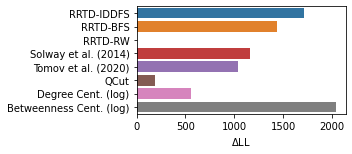

In [27]:
f, ax = plt.subplots(1, 1, figsize=(5, 2.25))
analysis.FeatureSelection.rel_plot(mdf, key='LL', ax=ax)
plt.tight_layout()
analysis.savefig('feature-selection-icon-confound.*')

In [28]:
def print_table(mdf):
    models_by_name = {
        row.model_info.key: row.model
        for row in mdf.itertuples()
        if row.model_info is not None
    }

    mcdf = []
    for mtype in analysis.models_without_random_or_fixed:
        mm = models_by_name[mtype.key]
        beta = mm['coef']['Estimate'][mtype.key]
        beta_se = mm['coef']['Std. Error'][mtype.key]
        # print(mtype, mm['lrtests'].keys())
        lrt = mm['lrtests'][('icon_name',)]
        pv = lrt['Pr(>Chisq)'][1]
        chisq = lrt['Chisq'][1]
        df = lrt['Df'][1]
        row = {
            'Algorithm': mtype.name,#.replace(' (', ' \n('),
            f'$\\beta$': f'{beta:.02f}',
            f'SE': f'{beta_se:.02f}',
            'Likelihood ratio test': f'$\\chi^2({int(df)})={chisq:.1f}$, ${analysis.pvalue(pv)}$',
        }
        mcdf.append(row)
    mcdf = pd.DataFrame(mcdf)#.set_index('Algorithm')

    with pd.option_context('display.max_colwidth', 999999):
        lines = mcdf.to_latex(escape=False, index_names=False, index=False).split('\n')
        print('\n'.join([
            # f'\\rule{{0pt}}{{3em}}{line}[2em]\n\\hline' if r'\\' in line else line
            (
                line
                .replace(r'\toprule', r'\thickhline')
                .replace(r'\midrule', r'\hline')
                .replace(r'\bottomrule', '')
            )
            for line in lines
        ]))

print_table(mdf)

\begin{tabular}{llll}
\thickhline
              Algorithm & $\beta$ &   SE &          Likelihood ratio test \\
\hline
             RRTD-IDDFS &    1.80 & 0.02 & $\chi^2(2)=3901.1$, $p < .001$ \\
               RRTD-BFS &    4.38 & 0.07 & $\chi^2(2)=3335.0$, $p < .001$ \\
                RRTD-RW &    0.35 & 0.02 &  $\chi^2(2)=471.5$, $p < .001$ \\
   Solway et al. (2014) &    0.68 & 0.01 & $\chi^2(2)=2786.9$, $p < .001$ \\
    Tomov et al. (2020) &    0.96 & 0.02 & $\chi^2(2)=2545.5$, $p < .001$ \\
                   QCut &   -0.26 & 0.01 &  $\chi^2(2)=838.7$, $p < .001$ \\
     Degree Cent. (log) &    0.68 & 0.01 & $\chi^2(2)=1585.7$, $p < .001$ \\
Betweenness Cent. (log) &    0.99 & 0.01 & $\chi^2(2)=4543.3$, $p < .001$ \\

\end{tabular}



## Quality control: Re-running one main analysis to ensure icon formulation is the same

In the above comparison between IDDFS and the null model for the Explicit Probe, we have a $\Delta$LL of 2591.6. We get the same numbers here using this formulation, if we use a simple null model in place of the icon model:

- Null LL: -15684
- IDDFS LL: -13092
- $\Delta$LL: 2592

In [29]:
_chance_ll(mlogitdf2[mlogitdf2['copy']=='subgoal'])

-15684.035801387643

In [30]:
df = tools1_11.convert_df_to_rdf(tools1_11.normdf(mlogitdf2[mlogitdf2['copy']=='subgoal']))

tools1_11.r_with_vars('''
m0 = runmlogit(df, c(factor), rpar=T, show_summary=T)
c()
''', df=df, factor='iddfs')


Call:
mlogit(formula = choice ~ iddfs - 1 | 0 | 0, data = dff, rpar = c(iddfs = "n"), 
    R = R, halton = NA, panel = TRUE)

Frequencies of alternatives:choice
       1        2        3        4        5        6        7 
0.135980 0.112779 0.075434 0.069851 0.127916 0.211042 0.266998 

bfgs method
12 iterations, 0h:0m:13s 
g'(-H)^-1g = 4.46E-06 
successive function values within tolerance limits 

Coefficients :
         Estimate Std. Error z-value  Pr(>|z|)    
iddfs    1.782104   0.035762  49.833 < 2.2e-16 ***
sd.iddfs 1.655597   0.047419  34.914 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log-Likelihood: -13092

random coefficients
      Min.   1st Qu.   Median     Mean  3rd Qu. Max.
iddfs -Inf 0.6654211 1.782104 1.782104 2.898787  Inf


<rpy2.rinterface_lib.sexp.NULLType object at 0x172c683c0> [RTYPES.NILSXP]